# Supreme Court Project

[This is a guided project]



The ultimate goal of this project is to build a database of U.S. Supreme Court cases for 2019 that includes the dialogue from the oral arguments of each case. This was done by scraping information from https://www.supremecourt.gov/oral_arguments/argument_transcript/2019, and individual case websites for further information on each one according to docket number.

I thereby created:-
<br>(i) a .csv file that divides cases based on the districts (circuits), date of hearing, 
<br>(ii) another .csv file that includes the associated district and the duration of each case, and lastly 
<br>(iii) a .csv file that holds case-wise oral transcripts and their respective speakers.

Using these databases, I tried to calculate which district had cases that took most of the Supreme Court's time, and by how much.

### Step 1: Scrape

Scraping for docket number, case name and date of hearing from:
https://www.supremecourt.gov/oral_arguments/argument_transcript.aspx 


In [1]:
###Import your scraping libraries

import requests
from bs4 import BeautifulSoup
my_url = "https://www.supremecourt.gov/oral_arguments/argument_transcript/2019"
raw_html = requests.get(my_url).content

soup_doc = BeautifulSoup(raw_html, "html.parser")
print(soup_doc.prettify())

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml">
 <head id="ctl00_ctl00_Head1">
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="txt/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <script src="/js/jquery-3.1.0.min.js" type="text/javascript">
  </script>
  <script src="/js/bootstrap.js" type="text/javascript">
  </script>
  <link href="/css/font-awesome.min.css" rel="stylesheet" type="text/css"/>
  <link href="/css/bootstrap.min.css" rel="Stylesheet" type="text/css"/>
  <link href="/css/bootstrap-theme.min.css" rel="Stylesheet" type="text/css"/>
  <link href="/styles/newBootStrap2.css" rel="stylesheet" type="text/css"/>
  <!-- HTML5 shim and Respond.js IE8 support of HTML5 elements and media queries -->
  <!--[if lt IE 9]>
          <script src="/js/html5shiv.js"></script>
          <script src="/js/respond.min.js"></script>
        <![endif]-->
  <!--[if lt IE 8]>
          <

In [2]:
import re

In [3]:
###Write your scraping code here


big_list = []
all_tables = soup_doc.find_all(class_='table table-bordered')
rows = []
for each_table in all_tables:
    rows = each_table.find_all('tr')
#     print(rows)
    for each_row in rows[1:]:
        dict = {}
        info = each_row.find_all('td')
#         print(info)
        link = info[0].a['href']
        docket = re.findall(r"\d\d-.*_.{4}", link)
        title = info[0].find_all('span')[1].text
        date = info[1].text
        dict['docket_no'] = docket[0]
        dict['title'] = title
        dict['date'] = date
        big_list.append(dict)

In [4]:
###Print out your list of lists or dictionaries here

big_list

[{'docket_no': '19-46_bq7d',
  'title': 'Patent and Trademark Office v. Booking.com B.V.',
  'date': '05/04/20'},
 {'docket_no': '19-177_p8k0',
  'title': 'Agency for Int’l Development v. Alliance for Open Society Int’l, Inc.',
  'date': '05/05/20'},
 {'docket_no': '19-431_d1o2',
  'title': 'Little Sisters of the Poor Saints Peter and Paul Home v. Pennsylvania',
  'date': '05/06/20'},
 {'docket_no': '19-631_omjp',
  'title': 'Barr v. American Assn. of Political Consultants, Inc.',
  'date': '05/06/20'},
 {'docket_no': '18-9526_n758',
  'title': 'McGirt v. Oklahoma',
  'date': '05/11/20'},
 {'docket_no': '19-267_3e04',
  'title': 'Our Lady of Guadalupe School v. Morrissey-Berru',
  'date': '05/11/20'},
 {'docket_no': '19-715_h3ci',
  'title': 'Trump v. Mazars USA, LLP',
  'date': '05/12/20'},
 {'docket_no': '19-635_1bn2', 'title': 'Trump v. Vance', 'date': '05/12/20'},
 {'docket_no': '19-465_c0n2',
  'title': 'Chiafalo v. Washington',
  'date': '05/13/20'},
 {'docket_no': '19-518_fcgk',

Now we convert the list into a dataframe using pandas.

In [5]:
import pandas as pd
sc_case_list = pd.DataFrame(big_list)

In [6]:
sc_case_list.head(15)

,docket_no,title,date
0,19-46_bq7d,Patent and Trademark Office v. Booking.com B.V.,05/04/20
1,19-177_p8k0,Agency for Int’l Development v. Alliance for O...,05/05/20
2,19-431_d1o2,Little Sisters of the Poor Saints Peter and Pa...,05/06/20
3,19-631_omjp,Barr v. American Assn. of Political Consultant...,05/06/20
4,18-9526_n758,McGirt v. Oklahoma,05/11/20
5,19-267_3e04,Our Lady of Guadalupe School v. Morrissey-Berru,05/11/20
6,19-715_h3ci,"Trump v. Mazars USA, LLP",05/12/20
7,19-635_1bn2,Trump v. Vance,05/12/20
8,19-465_c0n2,Chiafalo v. Washington,05/13/20
9,19-518_fcgk,Colorado Dept. of State v. Baca,05/13/20


### STEP 2 

The transcripts website did not include information on which district/ circuit the case was from. So, I try to scrape https://www.supremecourt.gov/search.aspx?filename=/docket/docketfiles/html/public/18-1432.html

In [7]:
#Writing a function that takes individual docket numbers as parameters and extracts circuit

def circuit_scraper(docket):
    dock_no = docket.split('_')[0]
    my_url = "https://www.supremecourt.gov/search.aspx?filename=/docket/docketfiles/html/public/"+dock_no+".html"
    raw_html = requests.get(my_url).content
    circ_soup = BeautifulSoup(raw_html, "html.parser")
    
    table = circ_soup.find(id='docketinfo').find_all('tr')[5]
    circ_span = table.find_all('span')[1].text
    circ_pattern = r'(\w+) Circuit'
    circuit = re.findall(circ_pattern, circ_span)
    return circuit
    




In [8]:
#Executing the above function to have a list of dictionaries of docket numbers and circuits.
#Also created a list of dockets to exclude

circ_list = []
exclude_dockets = []


for i in sc_case_list['docket_no']:
    circ_dic = {}
    circ_name = circuit_scraper(i)
    if (len(circ_name)!=0):
        circ_dic['docket_no'] = i
        if (circ_name[0] == 'Columbia'):
            circ_dic['circuit'] = 'District of Columbia'
        else:
            circ_dic['circuit'] = circ_name[0]
        circ_list.append(circ_dic)
    else: exclude_dockets.append(i)
circ_list
        


[{'docket_no': '19-46_bq7d', 'circuit': 'Fourth'},
 {'docket_no': '19-177_p8k0', 'circuit': 'Second'},
 {'docket_no': '19-431_d1o2', 'circuit': 'Third'},
 {'docket_no': '19-631_omjp', 'circuit': 'Fourth'},
 {'docket_no': '19-267_3e04', 'circuit': 'Ninth'},
 {'docket_no': '19-715_h3ci', 'circuit': 'District of Columbia'},
 {'docket_no': '19-635_1bn2', 'circuit': 'Second'},
 {'docket_no': '19-518_fcgk', 'circuit': 'Tenth'},
 {'docket_no': '18-1584_onkq', 'circuit': 'Fourth'},
 {'docket_no': '17-1268_l537', 'circuit': 'District of Columbia'},
 {'docket_no': '19-67_e1p3', 'circuit': 'Ninth'},
 {'docket_no': '18-8369_p86b', 'circuit': 'Tenth'},
 {'docket_no': '18-1432_22p3', 'circuit': 'Eleventh'},
 {'docket_no': '19-161_pok0', 'circuit': 'Ninth'},
 {'docket_no': '19-7_3e04', 'circuit': 'Ninth'},
 {'docket_no': '18-1501_8n59', 'circuit': 'Ninth'},
 {'docket_no': '18-1323_d18e', 'circuit': 'Fifth'},
 {'docket_no': '18-1086_d18f', 'circuit': 'Second'},
 {'docket_no': '17-1712_3fb4', 'circuit'

In [9]:
circuit_df = pd.DataFrame(circ_list)
circuit_df.head()

,docket_no,circuit
0,19-46_bq7d,Fourth
1,19-177_p8k0,Second
2,19-431_d1o2,Third
3,19-631_omjp,Fourth
4,19-267_3e04,Ninth


In [56]:
# Some dockets were not from any of the 13 appellate courts, and hence had to be excluded
# For example: Court of Criminal Appeals of Oklahoma(18-9526), Supreme Court of Washington(19-465)
# Also included docket_no 18-877_6jfm, which could not be scraped in Step 3 because it's format was different
# They are all in a list called excluded_dockets

exclude_dockets.append('18-877_6jfm')
exclude_dockets

['18-9526_n758',
 '19-465_c0n2',
 '18-1195_ap6b',
 '17-1498_5if6',
 '18-1109_0pm1',
 '18-556_5ifl',
 '18-6135_k536',
 '17-834_5h25',
 '18-877_6jfm',
 '18-877_6jfm']

### STEP 3

Cleaning up a pile of PDF to .text files in order to to have a separate list for each case that contains the speaker and the dialogue attached to that speaker.

Now to attempt splitting the speaker and their speeches to form a list, and then to proceed making a list of dictionaries.

In [19]:
docket_no_list = sc_case_list['docket_no']
docket_no_list[12]

'19-67_e1p3'

In [20]:
sc_transcript_list = []
time_dict = {}
for file in range(0, len(sc_case_list)-1, 1):
    if (docket_no_list[file]not in exclude_dockets):
        file_link = '/Users/karthikanamboothiri/Desktop/Columbia_academics/Data_databases/Project/2019pdfs_new/'+ docket_no_list[file]+'.txt'
        text_file = open(file_link, 'r')
        each_transcript = text_file.read()
        # Splitting text based on time_stamp of (10:04 a.m)
        start_time= re.split(r"(\(\d+:\d+ \w.\w.\))", each_transcript)[1].strip('(').strip(')')
        second_part = re.split(r"(\(\d+:\d+ \w.\w.\))", each_transcript)[2]
        
        end_pattern = r"\d+:\d\d \w\.\w\.[\s,]*"
        end_time = re.findall(end_pattern, second_part)[0].strip(", ")
        
        
        # Cleaning out the last bit of the text to remove everything after (Whereupon, at 12:55 p.m., the case was submitted.)
        last_pattern = r"\(Whereupon, at \d\d:\d\d \w.\w., the case \n\nwas submitted.\)"
        clean2 = re.split(last_pattern, second_part)[0]
        
        # Must get rid of all the 'Heritage Reporting Corporation' and following page numbers!!
        heritage = r"\n+Heritage Reporting Corporation [\n\D]+[\s\n+\d+]+"
        clean3 = re.sub(heritage, "", clean2)
        
        #Getting rid of all the \ns
        nnns = re.findall(r"\n", clean3)
        clean4 = re.sub("\n", "", clean3)
        
        speaker_pattern = r"([A-Z]+\.*[\sA-Z]+:)"
        speaker = re.findall(speaker_pattern, clean4)
        speaker_list = re.split(speaker_pattern,clean4)
        speaker_list = speaker_list[1:]
        
        time_dict['docket_no'] = docket_no_list[file]
        time_dict['start_time'] = start_time
        time_dict['end_time'] = end_time
        
        #List to List of dictionaries!

        for each in range(0, len(speaker_list)-1, 2):
            speaker_word_dict = {}
            speaker_word_dict['docket_no'] = docket_no_list[file]
            speaker_word_dict['speaker'] = speaker_list[each]
            speaker_word_dict['words'] = speaker_list[each+1]
            speaker_word_dict['start_time'] = start_time
            speaker_word_dict['end_time'] = end_time
            sc_transcript_list.append(speaker_word_dict)
        

## Getting down to the actual article analysis

#### Using the dataframes from all the above steps, we will analyze the total duration of cases from each district.

In [21]:
sc_df = pd.DataFrame(sc_transcript_list)

In [22]:
sc_df.head()

,docket_no,speaker,words,start_time,end_time
0,19-46_bq7d,CHIEF JUSTICE ROBERTS:,We'll hear argument this morning in Case 19-4...,10:00 a.m.,11:16 a.m.
1,19-46_bq7d,MS. ROSS:,"Mr. Chief Justice, and may it please the Cour...",10:00 a.m.,11:16 a.m.
2,19-46_bq7d,CHIEF JUSTICE ROBERTS:,Counsel --,10:00 a.m.,11:16 a.m.
3,19-46_bq7d,MS. ROSS:,-- thus resulting in --,10:00 a.m.,11:16 a.m.
4,19-46_bq7d,CHIEF JUSTICE ROBERTS:,"-- counsel, you mentioned the Goodyear case, ...",10:00 a.m.,11:16 a.m.


In [57]:
# creating a dataframe called time

time = sc_df[['docket_no', 'start_time', 'end_time']]
time.drop_duplicates()
time['start_time'] = pd.to_datetime(time['start_time']).dt.time

<ipython-input-57-8b11c83d7b81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['start_time'] = pd.to_datetime(time['start_time']).dt.time


In [54]:
#We now get only one row per docket_no

time = time.drop_duplicates()

In [ ]:
#Columns start_time and end_time need to be converted to datetime formats
# in order to subtract them from each other


time['end_time'] =pd.to_datetime(time['end_time']).dt.time

In [26]:
# (df.fr-df.to).astype('timedelta64[h]')
import datetime
import numpy as np

In [30]:
time = pd.merge(time, circuit_df, on='docket_no', how='inner')
time.drop_duplicates()

,docket_no,start_time,end_time,circuit_x,circuit_y
0,19-46_bq7d,10:00:00,11:16:00,Fourth,Fourth
1,19-177_p8k0,10:00:00,11:09:00,Second,Second
2,19-431_d1o2,10:00:00,11:40:00,Third,Third
3,19-631_omjp,11:42:00,12:55:00,Fourth,Fourth
4,19-267_3e04,11:35:00,13:14:00,Ninth,Ninth
5,19-715_h3ci,10:00:00,11:37:00,District of Columbia,District of Columbia
6,19-635_1bn2,11:40:00,13:22:00,Second,Second
7,19-518_fcgk,11:18:00,12:19:00,Tenth,Tenth
8,18-1584_onkq,10:07:00,11:09:00,Fourth,Fourth
9,17-1268_l537,11:10:00,12:11:00,District of Columbia,District of Columbia


In [42]:
time= time.rename(columns={"circuit_x": "circuit"})

In [48]:
time['case_duration'] = np.nan
for i in range(0, time.shape[0], 1):
    start_time = time['start_time'][i]
    stop_time = time['end_time'][i]

    date = datetime.date(1, 1, 1)
    datetime1 = datetime.datetime.combine(date, start_time)
    datetime2 = datetime.datetime.combine(date, stop_time)
    time_elapsed = datetime2 - datetime1
    time['case_duration'][i] = time_elapsed
#     print(time_elapsed)

time

<ipython-input-48-db282f373d73>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time['case_duration'][i] = time_elapsed
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,docket_no,start_time,end_time,circuit,case_duration
0,19-46_bq7d,10:00:00,11:16:00,Fourth,1:16:00
1,19-177_p8k0,10:00:00,11:09:00,Second,1:09:00
2,19-431_d1o2,10:00:00,11:40:00,Third,1:40:00
3,19-631_omjp,11:42:00,12:55:00,Fourth,1:13:00
4,19-267_3e04,11:35:00,13:14:00,Ninth,1:39:00
5,19-715_h3ci,10:00:00,11:37:00,District of Columbia,1:37:00
6,19-635_1bn2,11:40:00,13:22:00,Second,1:42:00
7,19-518_fcgk,11:18:00,12:19:00,Tenth,1:01:00
8,18-1584_onkq,10:07:00,11:09:00,Fourth,1:02:00
9,17-1268_l537,11:10:00,12:11:00,District of Columbia,1:01:00


In [49]:
#Need to convert case_duration to minutes

time['case_duration_min']= pd.to_timedelta(time['case_duration']).astype('timedelta64[m]').astype(int)


In [50]:
circuit_time = time.groupby('circuit', as_index=False)['case_duration_min'].sum().sort_values(by='case_duration_min',ascending=False)
circuit_time

,circuit,case_duration_min
7,Ninth,614
2,Eleventh,425
8,Second,356
4,Fifth,287
11,Third,275
6,Fourth,272
3,Federal,236
9,Sixth,180
10,Tenth,179
0,District of Columbia,158


## Creating pie charts per circuit

In [51]:
pie_stuff = time.groupby('circuit')['case_duration_min'].sum().sort_values(ascending=False)

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
%matplotlib inline

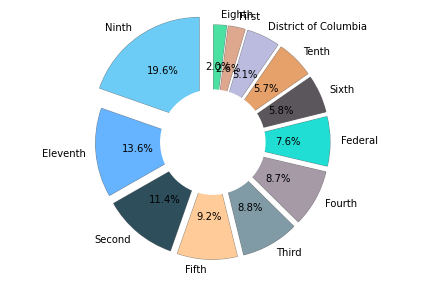

In [53]:
# I created a pie chart for each circuit- manually- by meddling with the 'explode' variable below
# to have the concerned circuit segment pop-out

fig, ax = plt.subplots()
explode=(400,200,200,200,200,200,200,200,200,200,200,200)
labels = ['Ninth', 'Eleventh', 'Second', 'Fifth', 'Third', 'Fourth', 'Federal', 'Sixth', 'Tenth', 'District of Columbia', 'First', 'Eighth']
colors = ['#6CCCF5','#66b3ff','#2E4E5C','#ffcc99', '#809AA6', '#A59AA6', '#21DED4', '#5B555C', '#E6A16A', '#BABBDE', '#DEA88E', '#4AE1A3' ]

ax.pie(pie_stuff, colors= colors, labels= labels, explode = explode, autopct='%1.1f%%', startangle=90,radius=1.8 * 1000, shadow = True)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

centre_circle = plt.Circle((0,0),900,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.tight_layout()

plt.show()

## Map making time!

In [ ]:
#Some nice imports
import requests
import json
import numpy as np
import pandas as pd
from pandas import json_normalize

In [ ]:
##Load the geojson file Exported from Mapshaper

with open('courts13.json') as json_data:
    geometry_data = json.load(json_data)

In [ ]:
##Normalize the hierarchy  so you have simple rows in a dataframe
##Note that you need to extract it from geometry_data['features']
df = pd.DataFrame.from_dict(json_normalize(geometry_data['features']), orient='columns')

In [ ]:
df['properties.name'] = ['Eleventh', 'Ninth', 'Eighth', 'Tenth', 'Second', 'Fourth', 'District of Columbia', 'Seventh', 'Sixth', 'Fifth', 'First', 'Third']

In [ ]:
def add_text(cell): 
    return "Circuit " + cell 

In [ ]:
df['properties.headline'] = df['properties.District_N'].apply(add_text)

In [58]:
## Writing out our articles under 'nice_text'
## I have incorporated each pie chart source link within the article html

def nice_text(district):
    d = district.upper() + " CIRCUIT"
    for i in range(0,len(circuit_time)-1,1):
        if (district == circuit_time['circuit'][i]):
            article = d+"<br><br>There are 13 appellate courts that sit below the U.S. Supreme Court, and they are called the U.S. Courts of Appeals. The 94 federal judicial districts are organized into 12 regional circuits, each of which has a court of appeals.  The appellate court’s task is to determine whether or not the law was applied correctly in the trial court.<br><br>In 2019,"+ " " + str(cases[district])+ " " + "cases proceeded to the Supreme Court from the" + " " +district+ " " + "district.<br>It took a total of"+ " " + str(circuit_time["case_duration_min"][i]) + " " + "minutes to hear all of them<br><br><img src='graphic/graphic_dis"+str(i)+".png' width=500>"
            if (district == 'Third'):
                article = d+"<br><br>There are 13 appellate courts that sit below the U.S. Supreme Court, and they are called the U.S. Courts of Appeals. The 94 federal judicial districts are organized into 12 regional circuits, each of which has a court of appeals.  The appellate court’s task is to determine whether or not the law was applied correctly in the trial court.<br><br>In 2019,"+ " " + str(cases[district])+ " " + "cases proceeded to the Supreme Court from the" + " " +district+ " " + "district.<br>It took a total of"+ " " + str(circuit_time["case_duration_min"][i]) + " " + "minutes to hear all of them<br><br><img src='graphic/graphic_dis3.png' width=500>"
            return article
#

In [ ]:
df['properties.article'] = df['properties.name'].apply(nice_text)

In [ ]:
df['properties.colors'] = colors

In [ ]:
df['properties.rating'] = df['properties.District_N'].replace('District of Columbia', 0)

In [ ]:
#Turning back into json format

ok_json = json.loads(df.to_json(orient='records'))

In [ ]:
def process_to_geojson(file):
    geo_data = {"type": "FeatureCollection", "features":[]}
    for row in file:
        this_dict = {"type": "Feature", "properties":{}, "geometry": {}}
        for key, value in row.items():
            key_names = key.split('.')
            if key_names[0] == 'geometry':
                this_dict['geometry'][key_names[1]] = value
            if str(key_names[0]) == 'properties':
                this_dict['properties'][key_names[1]] = value
        geo_data['features'].append(this_dict)
    return geo_data

In [ ]:
geo_format = process_to_geojson(ok_json)

In [ ]:
#Variable name
with open('geo-data.js', 'w') as outfile:
    outfile.write("var infoData = ")
#geojson output
with open('geo-data.js', 'a') as outfile:
    json.dump(geo_format, outfile)